In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/Colab Notebooks/zip.zip'
extract_path = '/content/drive/MyDrive/Colab Notebooks/zip_extracted'

# Çıkarılacak klasörü oluştur (varsa hata vermez)
os.makedirs(extract_path, exist_ok=True)

# Zip dosyasını aç ve çıkar
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"ZIP dosyası şuraya çıkarıldı: {extract_path}")


ZIP dosyası şuraya çıkarıldı: /content/drive/MyDrive/Colab Notebooks/zip_extracted


In [4]:
import zipfile
import os

# Zip dosyasının yolu
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/output.zip'

# Hedef dizin
output_dir = '/content/'

# Hedef dizin yoksa oluşturuluyor
os.makedirs(output_dir, exist_ok=True)

# Zip dosyasını açma ve içeriğini çıkartma
with zipfile.ZipFile(zip_file_path, 'r') as zipf:
    zipf.extractall(output_dir)

print(f"Zip dosyası başarıyla '{output_dir}' dizinine çıkarıldı!")


Zip dosyası başarıyla '/content/' dizinine çıkarıldı!


In [5]:
!cp -r /content/drive/MyDrive/Colab\ Notebooks/zip_extracted/zip /content/


In [6]:
pip install beautifulsoup4 pandas  matplotlib


In [7]:
!cp  /content/zip/* /content/


cp: -r not specified; omitting directory '/content/zip/data'
cp: -r not specified; omitting directory '/content/zip/turkce-isimler'


In [8]:
import subprocess

# Çalıştırılacak dosyalar listesi
files = [
    '/content/zip/test0.py',
    '/content/zip/test1.py',
    '/content/zip/test2.py',

]

# Sırayla çalıştır
for file in files:
    print(f"Şu anda çalıştırılıyor: {file}")
    subprocess.run(['python3', file])


Şu anda çalıştırılıyor: /content/zip/test0.py
Şu anda çalıştırılıyor: /content/zip/test1.py
Şu anda çalıştırılıyor: /content/zip/test2.py


In [ ]:
# !python3  /content/test3.py

bias eklenrili

Kullanılan cihaz: cuda
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Veri yükleniyor...
Kelime dağarcığı büyüklüğü: 92580
Etiket sayısı: 3802
Model oluşturuluyor...
Bias değerleri başlatıldı!
Tüm ağırlıklar özel olarak başlatıldı!
Toplam parametre sayısı: 100,990,731
Eğitim başlıyor...

Epoch 1/20


<ipython-input-9-4c156683c64b>:276: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler() if mixed_precision else None
<ipython-input-9-4c156683c64b>:295: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Batch 10/124 - Loss: 7.1014
Batch 20/124 - Loss: 6.0243
Batch 30/124 - Loss: 5.7992
Batch 40/124 - Loss: 5.6461
Batch 50/124 - Loss: 5.6364
Batch 60/124 - Loss: 5.5209
Batch 70/124 - Loss: 5.5627
Batch 80/124 - Loss: 5.3806
Batch 90/124 - Loss: 5.3462
Batch 100/124 - Loss: 5.2926
Batch 110/124 - Loss: 5.1943
Batch 120/124 - Loss: 5.0270
Train Loss: 5.7267 - Train Acc: 0.1546 - Train F1: 0.0004 - Val Loss: 4.9667 - Val Acc: 0.2056 - Val F1: 0.0012 - LR: 0.001000 - Time: 175.35s
En iyi model kaydedildi: /content/checkpoints/model_epoch_1_valf1_0.0012.pt

Epoch 2/20
Batch 10/124 - Loss: 4.9104
Batch 20/124 - Loss: 4.7871
Batch 30/124 - Loss: 4.6828
Batch 40/124 - Loss: 4.5769
Batch 50/124 - Loss: 4.3804
Batch 60/124 - Loss: 4.2834
Batch 70/124 - Loss: 4.2101
Batch 80/124 - Loss: 4.1096
Batch 90/124 - Loss: 3.9510
Batch 100/124 - Loss: 3.8489
Batch 110/124 - Loss: 3.7328
Batch 120/124 - Loss: 3.5931
Train Loss: 4.2961 - Train Acc: 0.2526 - Train F1: 0.0040 - Val Loss: 3.3051 - Val Acc: 0.3

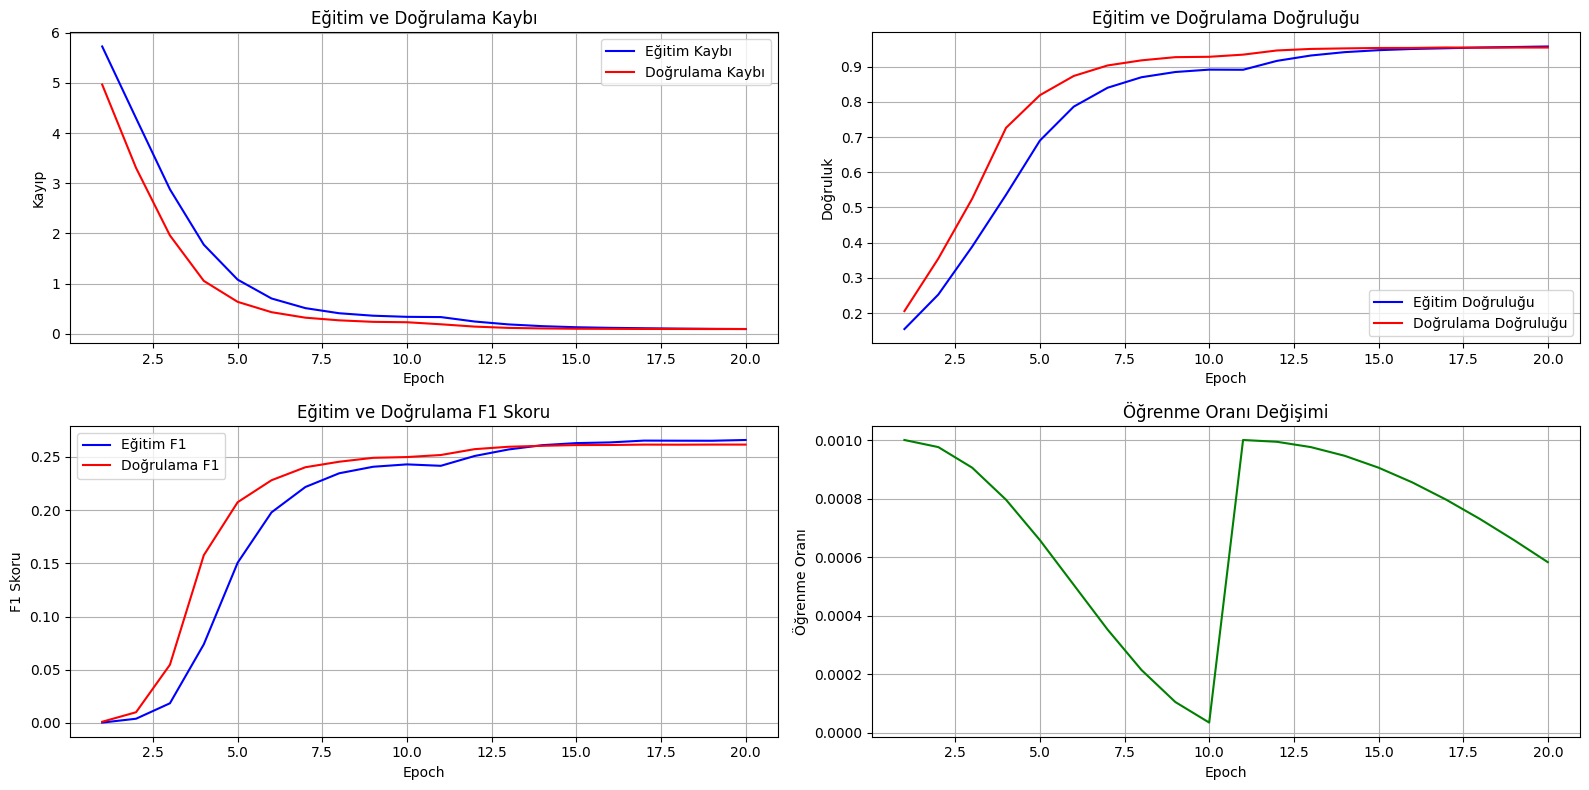

Test ediliyor...

Test sonuçları:
Test Loss: 0.0949 - Test Acc: 0.9545 - Test F1: 0.2619
Final model kaydedildi: /content/drive/MyDrive/enhanced_final_model_with_bias.pt
Test sonuçları kaydedildi: /content/drive/MyDrive/test_results_with_bias.npy


In [9]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import os
import time
from google.colab import drive
import gc
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
from torch.cuda.amp import autocast, GradScaler

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Kullanılan cihaz: {device}")

class AttentionLayer(nn.Module):
    def __init__(self, hidden_size):
        super(AttentionLayer, self).__init__()
        self.hidden_size = hidden_size
        self.attention = nn.Sequential(
            nn.Linear(hidden_size, hidden_size // 2, bias=True),  # Bias eklendi
            nn.Tanh(),
            nn.Linear(hidden_size // 2, 1, bias=True)  # Bias eklendi
        )

    def forward(self, lstm_output, mask=None):
        batch_size, seq_len, hidden_size = lstm_output.size()

        attention_weights = self.attention(lstm_output).squeeze(-1)

        if mask is not None:
            attention_weights = attention_weights.masked_fill(mask == 0, -1e10)

        attention_weights = torch.softmax(attention_weights, dim=1)
        attention_weights = attention_weights.unsqueeze(2)

        context_vector = torch.sum(attention_weights * lstm_output, dim=1)

        return context_vector, attention_weights

class EnhancedLSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, output_size, n_layers=2, dropout=0.3, bidirectional=True, bias_initialization=0.1):
        super(EnhancedLSTMModel, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.dropout_emb = nn.Dropout(dropout)

        # LSTM'de bias parametreleri açıkça belirtildi
        self.lstm = nn.LSTM(
            embedding_dim,
            hidden_size,
            num_layers=n_layers,
            batch_first=True,
            dropout=dropout if n_layers > 1 else 0,
            bidirectional=bidirectional,
            bias=True  # Bias açıkça etkinleştirildi
        )

        self.dropout = nn.Dropout(dropout)
        self.bidirectional = bidirectional
        self.lstm_output_size = hidden_size * 2 if bidirectional else hidden_size

        self.attention = AttentionLayer(self.lstm_output_size)

        # Lineer katmanlarda bias parametreleri açıkça belirtildi
        self.fc1 = nn.Linear(self.lstm_output_size, self.lstm_output_size // 2, bias=True)
        self.bn1 = nn.BatchNorm1d(self.lstm_output_size // 2)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(self.lstm_output_size, output_size, bias=True)

        # Bias ağırlıklarını başlatma
        self._initialize_biases(bias_initialization)

    def _initialize_biases(self, bias_value=0.1):
        """Tüm lineer katmanların bias değerlerini başlatır"""
        # LSTM biaslarını doğrudan başlatmak zordur, PyTorch API'sinde açıkça belirtilmemiştir
        # Bu nedenle sadece lineer katmanların biaslarını başlatıyoruz

        # Dikkat mekanizmasının biasları
        for name, module in self.attention.named_modules():
            if isinstance(module, nn.Linear):
                nn.init.constant_(module.bias, bias_value)

        # FC1 bias başlatma
        nn.init.constant_(self.fc1.bias, bias_value)

        # FC2 bias başlatma
        nn.init.constant_(self.fc2.bias, bias_value)

        print("Bias değerleri başlatıldı!")

    def forward(self, x, lengths=None):
        embedded = self.embedding(x)
        embedded = self.dropout_emb(embedded)

        if lengths is not None:
            packed_embedded = pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)
            packed_output, (hidden, cell) = self.lstm(packed_embedded)
            lstm_output, _ = pad_packed_sequence(packed_output, batch_first=True)
        else:
            lstm_output, (hidden, cell) = self.lstm(embedded)

        mask = (x != 0).float().unsqueeze(-1)

        lstm_output = self.dropout(lstm_output)

        if self.bidirectional:
            hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)
        else:
            hidden = hidden[-1]

        # Sequence labeling için token-level çıktılar hesaplanır
        tag_outputs = self.fc2(lstm_output)

        return tag_outputs, mask.squeeze(-1)

    def initialize_weights(self):
        """Model ağırlıklarını özel olarak başlatmak için bir metod"""
        for name, param in self.named_parameters():
            if 'weight' in name:
                # Lineer katmanlar için Xavier başlatma
                if 'fc' in name:
                    nn.init.xavier_uniform_(param)
                # LSTM ağırlıkları için Orthogonal başlatma
                elif 'lstm' in name and 'weight' in name:
                    nn.init.orthogonal_(param)
            elif 'bias' in name:
                # Bias değerlerini sıfıra yakın bir değerle başlatma
                nn.init.constant_(param, 0.01)

        print("Tüm ağırlıklar özel olarak başlatıldı!")


def load_data(data_dir):
    train_sentences = np.load(os.path.join(data_dir, 'train_sentences.npy'), allow_pickle=True)
    train_labels = np.load(os.path.join(data_dir, 'train_labels.npy'), allow_pickle=True)

    val_sentences = np.load(os.path.join(data_dir, 'validation_sentences.npy'), allow_pickle=True)
    val_labels = np.load(os.path.join(data_dir, 'validation_labels.npy'), allow_pickle=True)

    test_sentences = np.load(os.path.join(data_dir, 'test_sentences.npy'), allow_pickle=True)
    test_labels = np.load(os.path.join(data_dir, 'test_labels.npy'), allow_pickle=True)

    return (train_sentences, train_labels), (val_sentences, val_labels), (test_sentences, test_labels)

def pad_sequences(sequences, max_len=None):
    if max_len is None:
        max_len = max(len(seq) for seq in sequences)

    padded = np.zeros((len(sequences), max_len), dtype=np.int32)
    sequence_lengths = []

    for i, seq in enumerate(sequences):
        seq_len = min(len(seq), max_len)
        padded[i, :seq_len] = seq[:seq_len]
        sequence_lengths.append(seq_len)

    return padded, np.array(sequence_lengths)

def create_dataloaders(sentences, labels, batch_size, shuffle=True):
    max_len = max(len(seq) for seq in sentences)

    padded_sentences, sequence_lengths = pad_sequences(sentences, max_len)
    padded_labels, _ = pad_sequences(labels, max_len)

    tensor_sentences = torch.LongTensor(padded_sentences)
    tensor_labels = torch.LongTensor(padded_labels)
    tensor_lengths = torch.LongTensor(sequence_lengths)

    dataset = TensorDataset(tensor_sentences, tensor_labels, tensor_lengths)

    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, pin_memory=True)

    return dataloader

def compute_accuracy(predictions, labels, mask):
    _, predicted_classes = predictions.max(dim=2)

    correct_predictions = (predicted_classes == labels).float() * mask

    accuracy = correct_predictions.sum().item() / mask.sum().item()

    return accuracy

def compute_f1_score(predictions, labels, mask, num_classes):
    _, predicted_classes = predictions.max(dim=2)

    # Her sınıf için true positives, false positives ve false negatives başlat
    tp = torch.zeros(num_classes, device=device)
    fp = torch.zeros(num_classes, device=device)
    fn = torch.zeros(num_classes, device=device)

    # Her sınıf için TP, FP, FN hesapla
    for c in range(1, num_classes):  # Padding sınıfını atla (0)
        predicted_c = (predicted_classes == c).float() * mask
        gold_c = (labels == c).float() * mask

        tp[c] = (predicted_c * gold_c).sum()
        fp[c] = (predicted_c * (1 - gold_c)).sum()
        fn[c] = ((1 - predicted_c) * gold_c).sum()

    # Precision ve Recall hesapla
    precision = tp / (tp + fp + 1e-10)
    recall = tp / (tp + fn + 1e-10)

    # F1 skorunu hesapla
    f1 = 2 * precision * recall / (precision + recall + 1e-10)

    # Macro F1 hesapla (padding hariç sınıflar arası ortalama F1)
    macro_f1 = f1[1:].mean().item()

    return macro_f1

def plot_training_history(history, save_path=None):
    epochs = [h[0] for h in history]

    plt.figure(figsize=(16, 8))

    plt.subplot(2, 2, 1)
    plt.plot(epochs, [h[1] for h in history], 'b-', label='Eğitim Kaybı')
    plt.plot(epochs, [h[3] for h in history], 'r-', label='Doğrulama Kaybı')
    plt.title('Eğitim ve Doğrulama Kaybı')
    plt.xlabel('Epoch')
    plt.ylabel('Kayıp')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 2)
    plt.plot(epochs, [h[2] for h in history], 'b-', label='Eğitim Doğruluğu')
    plt.plot(epochs, [h[4] for h in history], 'r-', label='Doğrulama Doğruluğu')
    plt.title('Eğitim ve Doğrulama Doğruluğu')
    plt.xlabel('Epoch')
    plt.ylabel('Doğruluk')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 3)
    plt.plot(epochs, [h[5] for h in history], 'b-', label='Eğitim F1')
    plt.plot(epochs, [h[6] for h in history], 'r-', label='Doğrulama F1')
    plt.title('Eğitim ve Doğrulama F1 Skoru')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Skoru')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 4)
    plt.plot(epochs, [h[7] for h in history], 'g-', label='Öğrenme Oranı')
    plt.title('Öğrenme Oranı Değişimi')
    plt.xlabel('Epoch')
    plt.ylabel('Öğrenme Oranı')
    plt.grid(True)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
        print(f"Grafik kaydedildi: {save_path}")

    plt.show()


def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler,
               epochs=100, checkpoint_dir="/content", drive_checkpoint_dir=None, patience=10,
               gradient_accumulation_steps=2, mixed_precision=True):
    os.makedirs(checkpoint_dir, exist_ok=True)
    if drive_checkpoint_dir:
        os.makedirs(drive_checkpoint_dir, exist_ok=True)

    best_val_f1 = 0.0
    wait = 0
    best_model_state = None

    history = []
    scaler = GradScaler() if mixed_precision else None

    num_classes = model.fc2.out_features

    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")
        start_time = time.time()

        model.train()
        train_loss = 0
        train_acc = 0
        train_f1 = 0

        optimizer.zero_grad()

        for batch_idx, (sentences, labels, lengths) in enumerate(train_loader):
            sentences, labels, lengths = sentences.to(device), labels.to(device), lengths.to(device)

            if mixed_precision:
                with autocast():
                    outputs, mask = model(sentences, lengths)

                    batch_size, seq_len, num_classes = outputs.size()
                    outputs_flat = outputs.view(-1, num_classes)
                    labels_flat = labels.view(-1)
                    mask_flat = mask.view(-1)

                    loss = criterion(outputs_flat, labels_flat)
                    loss = (loss * mask_flat).sum() / mask_flat.sum()

                scaler.scale(loss).backward()

                if (batch_idx + 1) % gradient_accumulation_steps == 0:
                    scaler.unscale_(optimizer)
                    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                    scaler.step(optimizer)
                    scaler.update()
                    optimizer.zero_grad()
            else:
                outputs, mask = model(sentences, lengths)

                batch_size, seq_len, num_classes = outputs.size()
                outputs_flat = outputs.view(-1, num_classes)
                labels_flat = labels.view(-1)
                mask_flat = mask.view(-1)

                loss = criterion(outputs_flat, labels_flat)
                loss = (loss * mask_flat).sum() / mask_flat.sum()

                loss.backward()

                if (batch_idx + 1) % gradient_accumulation_steps == 0:
                    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                    optimizer.step()
                    optimizer.zero_grad()

            train_loss += loss.item()
            train_acc += compute_accuracy(outputs, labels, mask)
            train_f1 += compute_f1_score(outputs, labels, mask, num_classes)

            if (batch_idx + 1) % 10 == 0:
                print(f"Batch {batch_idx+1}/{len(train_loader)} - Loss: {loss.item():.4f}")

        if (batch_idx + 1) % gradient_accumulation_steps != 0:
            if mixed_precision:
                scaler.unscale_(optimizer)
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                scaler.step(optimizer)
                scaler.update()
            else:
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                optimizer.step()
            optimizer.zero_grad()

        train_loss /= len(train_loader)
        train_acc /= len(train_loader)
        train_f1 /= len(train_loader)

        model.eval()
        val_loss = 0
        val_acc = 0
        val_f1 = 0

        with torch.no_grad():
            for sentences, labels, lengths in val_loader:
                sentences, labels, lengths = sentences.to(device), labels.to(device), lengths.to(device)

                outputs, mask = model(sentences, lengths)

                batch_size, seq_len, num_classes = outputs.size()
                outputs_flat = outputs.view(-1, num_classes)
                labels_flat = labels.view(-1)
                mask_flat = mask.view(-1)

                loss = criterion(outputs_flat, labels_flat)
                loss = (loss * mask_flat).sum() / mask_flat.sum()

                val_loss += loss.item()
                val_acc += compute_accuracy(outputs, labels, mask)
                val_f1 += compute_f1_score(outputs, labels, mask, num_classes)

        val_loss /= len(val_loader)
        val_acc /= len(val_loader)
        val_f1 /= len(val_loader)

        current_lr = optimizer.param_groups[0]['lr']

        scheduler.step()

        history.append((epoch + 1, train_loss, train_acc, val_loss, val_acc, train_f1, val_f1, current_lr))

        elapsed_time = time.time() - start_time
        print(f"Train Loss: {train_loss:.4f} - Train Acc: {train_acc:.4f} - Train F1: {train_f1:.4f} - "
              f"Val Loss: {val_loss:.4f} - Val Acc: {val_acc:.4f} - Val F1: {val_f1:.4f} - "
              f"LR: {current_lr:.6f} - Time: {elapsed_time:.2f}s")

        if val_f1 > best_val_f1:
            best_val_f1 = val_f1
            wait = 0
            # Sadece Colab'ın yerel diskine checkpoint'leri kaydet
            checkpoint_path = os.path.join(checkpoint_dir, f"model_epoch_{epoch+1}_valf1_{val_f1:.4f}.pt")
            best_model_state = {
                'epoch': epoch + 1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'val_loss': val_loss,
                'val_acc': val_acc,
                'val_f1': val_f1,
                'model_config': {  # Model yapılandırmasını da kaydedelim
                    'vocab_size': model.embedding.num_embeddings,
                    'embedding_dim': model.embedding.embedding_dim,
                    'hidden_size': model.lstm.hidden_size,
                    'output_size': model.fc2.out_features,
                    'n_layers': model.lstm.num_layers,
                    'dropout': model.dropout.p,
                    'bidirectional': model.bidirectional
                }
            }
            torch.save(best_model_state, checkpoint_path)
            print(f"En iyi model kaydedildi: {checkpoint_path}")
        else:
            wait += 1
            if wait >= patience:
                print(f"Early stopping! {patience} epoch boyunca iyileşme olmadı.")
                break

        torch.cuda.empty_cache()
        gc.collect()

    # Eğitim bittiğinde en iyi modeli drive'a kaydet
    if drive_checkpoint_dir and best_model_state:
        drive_checkpoint_path = os.path.join(drive_checkpoint_dir, "best_model.pt")
        torch.save(best_model_state, drive_checkpoint_path)
        print(f"En iyi model Google Drive'a kaydedildi: {drive_checkpoint_path}")

    return history

def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    test_acc = 0
    test_f1 = 0

    num_classes = model.fc2.out_features

    all_predictions = []
    all_labels = []
    all_masks = []

    with torch.no_grad():
        for sentences, labels, lengths in test_loader:
            sentences, labels, lengths = sentences.to(device), labels.to(device), lengths.to(device)

            outputs, mask = model(sentences, lengths)

            batch_size, seq_len, num_classes = outputs.size()
            outputs_flat = outputs.view(-1, num_classes)
            labels_flat = labels.view(-1)
            mask_flat = mask.view(-1)

            loss = criterion(outputs_flat, labels_flat)
            loss = (loss * mask_flat).sum() / mask_flat.sum()

            test_loss += loss.item()
            test_acc += compute_accuracy(outputs, labels, mask)
            test_f1 += compute_f1_score(outputs, labels, mask, num_classes)

            _, predicted = torch.max(outputs, 2)
            all_predictions.append(predicted.cpu().numpy())
            all_labels.append(labels.cpu().numpy())
            all_masks.append(mask.cpu().numpy())

    test_loss /= len(test_loader)
    test_acc /= len(test_loader)
    test_f1 /= len(test_loader)

    print(f"\nTest sonuçları:")
    print(f"Test Loss: {test_loss:.4f} - Test Acc: {test_acc:.4f} - Test F1: {test_f1:.4f}")

    return test_loss, test_acc, test_f1, all_predictions, all_labels, all_masks

def main():
    drive.mount('/content/drive')

    data_dir = "/content/numerized_data"
    embedding_dim = 300
    hidden_size = 1024
    batch_size = 512
    epochs = 20
    learning_rate = 0.001
    dropout = 0.4
    n_layers = 3
    bidirectional = True
    weight_decay = 1e-5
    gradient_accumulation_steps = 4
    mixed_precision = True
    bias_initialization = 0.01  # Bias değerlerini başlatmak için değer

    # Google Drive yolları
    drive_dir = "/content/drive/MyDrive"

    print("Veri yükleniyor...")
    try:
        train_data, val_data, test_data = load_data(data_dir)
    except FileNotFoundError:
        print(f"Hata: {data_dir} dizininde veri dosyaları bulunamadı.")
        print("Lütfen doğru veri yolunu belirtin veya dosyaları yükleyin.")
        return

    all_word_ids = np.concatenate([train_data[0], val_data[0], test_data[0]])
    vocab_size = np.max([np.max(seq) for seq in all_word_ids]) + 1

    all_label_ids = np.concatenate([train_data[1], val_data[1], test_data[1]])
    output_size = np.max([np.max(seq) for seq in all_label_ids]) + 1

    print(f"Kelime dağarcığı büyüklüğü: {vocab_size}")
    print(f"Etiket sayısı: {output_size}")

    train_loader = create_dataloaders(train_data[0], train_data[1], batch_size, shuffle=True)
    val_loader = create_dataloaders(val_data[0], val_data[1], batch_size, shuffle=False)
    test_loader = create_dataloaders(test_data[0], test_data[1], batch_size, shuffle=False)

    print("Model oluşturuluyor...")
    model = EnhancedLSTMModel(
        vocab_size=vocab_size,
        embedding_dim=embedding_dim,
        hidden_size=hidden_size,
        output_size=output_size,
        n_layers=n_layers,
        dropout=dropout,
        bidirectional=bidirectional,
        bias_initialization=bias_initialization
    )

    # Özel ağırlık başlatma
    model.initialize_weights()

    model = model.to(device)

    total_params = sum(p.numel() for p in model.parameters())
    print(f"Toplam parametre sayısı: {total_params:,}")

    criterion = nn.CrossEntropyLoss(reduction='none')
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    scheduler = CosineAnnealingWarmRestarts(
        optimizer,
        T_0=10,
        T_mult=2,
        eta_min=learning_rate/100
    )

    print("Eğitim başlıyor...")
    history = train_model(
        model,
        train_loader,
        val_loader,
        criterion,
        optimizer,
        scheduler,
        epochs=epochs,
        checkpoint_dir="/content/checkpoints",  # Ara checkpoint'ler Colab'ın yerel diskine
        drive_checkpoint_dir=drive_dir,  # En iyi model Drive'a kaydedilecek
        patience=10,
        gradient_accumulation_steps=gradient_accumulation_steps,
        mixed_precision=mixed_precision
    )

    # History grafiğini direkt Drive'a kaydet
    plot_training_history(history, save_path=f"{drive_dir}/enhanced_training_history_with_bias.png")

    print("Test ediliyor...")
    test_loss, test_acc, test_f1, predictions, labels, masks = evaluate_model(model, test_loader, criterion)

    result_dict = {
        'test_loss': test_loss,
        'test_acc': test_acc,
        'test_f1': test_f1,
    }

    # Model yapılandırma bilgilerini kaydet
    model_config = {
        'vocab_size': vocab_size,
        'embedding_dim': embedding_dim,
        'hidden_size': hidden_size,
        'output_size': output_size,
        'n_layers': n_layers,
        'dropout': dropout,
        'bidirectional': bidirectional,
    }

    # Final modeli Drive'a kaydet
    final_model_path = f"{drive_dir}/enhanced_final_model_with_bias.pt"
    torch.save({
        'model_state_dict': model.state_dict(),
        'model_config': model_config
    }, final_model_path)
    print(f"Final model kaydedildi: {final_model_path}")

    # Test sonuçlarını Drive'a kaydet
    np.save(f"{drive_dir}/test_results_with_bias.npy", result_dict)
    print(f"Test sonuçları kaydedildi: {drive_dir}/test_results_with_bias.npy")

if __name__ == "__main__":
    main()

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import os
import time
from google.colab import drive
import gc
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
from torch.cuda.amp import autocast, GradScaler

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Kullanılan cihaz: {device}")

class AttentionLayer(nn.Module):
    def __init__(self, hidden_size):
        super(AttentionLayer, self).__init__()
        self.hidden_size = hidden_size
        self.attention = nn.Sequential(
            nn.Linear(hidden_size, hidden_size // 2),
            nn.Tanh(),
            nn.Linear(hidden_size // 2, 1)
        )

    def forward(self, lstm_output, mask=None):
        batch_size, seq_len, hidden_size = lstm_output.size()

        attention_weights = self.attention(lstm_output).squeeze(-1)

        if mask is not None:
            attention_weights = attention_weights.masked_fill(mask == 0, -1e10)

        attention_weights = torch.softmax(attention_weights, dim=1)
        attention_weights = attention_weights.unsqueeze(2)

        context_vector = torch.sum(attention_weights * lstm_output, dim=1)

        return context_vector, attention_weights

class EnhancedLSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, output_size, n_layers=2, dropout=0.3, bidirectional=True):
        super(EnhancedLSTMModel, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.dropout_emb = nn.Dropout(dropout)

        self.lstm = nn.LSTM(
            embedding_dim,
            hidden_size,
            num_layers=n_layers,
            batch_first=True,
            dropout=dropout if n_layers > 1 else 0,
            bidirectional=bidirectional
        )

        self.dropout = nn.Dropout(dropout)
        self.bidirectional = bidirectional
        self.lstm_output_size = hidden_size * 2 if bidirectional else hidden_size

        self.attention = AttentionLayer(self.lstm_output_size)

        self.fc1 = nn.Linear(self.lstm_output_size, self.lstm_output_size // 2)
        self.bn1 = nn.BatchNorm1d(self.lstm_output_size // 2)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(self.lstm_output_size, output_size)

    def forward(self, x, lengths=None):
        embedded = self.embedding(x)
        embedded = self.dropout_emb(embedded)

        if lengths is not None:
            packed_embedded = pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)
            packed_output, (hidden, cell) = self.lstm(packed_embedded)
            lstm_output, _ = pad_packed_sequence(packed_output, batch_first=True)
        else:
            lstm_output, (hidden, cell) = self.lstm(embedded)

        mask = (x != 0).float().unsqueeze(-1)

        lstm_output = self.dropout(lstm_output)

        if self.bidirectional:
            hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)
        else:
            hidden = hidden[-1]

        # Compute token-level outputs for sequence labeling
        tag_outputs = self.fc2(lstm_output)

        return tag_outputs, mask.squeeze(-1)

def load_data(data_dir):
    train_sentences = np.load(os.path.join(data_dir, 'train_sentences.npy'), allow_pickle=True)
    train_labels = np.load(os.path.join(data_dir, 'train_labels.npy'), allow_pickle=True)

    val_sentences = np.load(os.path.join(data_dir, 'validation_sentences.npy'), allow_pickle=True)
    val_labels = np.load(os.path.join(data_dir, 'validation_labels.npy'), allow_pickle=True)

    test_sentences = np.load(os.path.join(data_dir, 'test_sentences.npy'), allow_pickle=True)
    test_labels = np.load(os.path.join(data_dir, 'test_labels.npy'), allow_pickle=True)

    return (train_sentences, train_labels), (val_sentences, val_labels), (test_sentences, test_labels)

def pad_sequences(sequences, max_len=None):
    if max_len is None:
        max_len = max(len(seq) for seq in sequences)

    padded = np.zeros((len(sequences), max_len), dtype=np.int32)
    sequence_lengths = []

    for i, seq in enumerate(sequences):
        seq_len = min(len(seq), max_len)
        padded[i, :seq_len] = seq[:seq_len]
        sequence_lengths.append(seq_len)

    return padded, np.array(sequence_lengths)

def create_dataloaders(sentences, labels, batch_size, shuffle=True):
    max_len = max(len(seq) for seq in sentences)

    padded_sentences, sequence_lengths = pad_sequences(sentences, max_len)
    padded_labels, _ = pad_sequences(labels, max_len)

    tensor_sentences = torch.LongTensor(padded_sentences)
    tensor_labels = torch.LongTensor(padded_labels)
    tensor_lengths = torch.LongTensor(sequence_lengths)

    dataset = TensorDataset(tensor_sentences, tensor_labels, tensor_lengths)

    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, pin_memory=True)

    return dataloader

def compute_accuracy(predictions, labels, mask):
    _, predicted_classes = predictions.max(dim=2)

    correct_predictions = (predicted_classes == labels).float() * mask

    accuracy = correct_predictions.sum().item() / mask.sum().item()

    return accuracy

def compute_f1_score(predictions, labels, mask, num_classes):
    _, predicted_classes = predictions.max(dim=2)

    # Initialize true positives, false positives, and false negatives for each class
    tp = torch.zeros(num_classes, device=device)
    fp = torch.zeros(num_classes, device=device)
    fn = torch.zeros(num_classes, device=device)

    # Compute TP, FP, FN for each class
    for c in range(1, num_classes):  # Skip padding class (0)
        predicted_c = (predicted_classes == c).float() * mask
        gold_c = (labels == c).float() * mask

        tp[c] = (predicted_c * gold_c).sum()
        fp[c] = (predicted_c * (1 - gold_c)).sum()
        fn[c] = ((1 - predicted_c) * gold_c).sum()

    # Compute precision and recall
    precision = tp / (tp + fp + 1e-10)
    recall = tp / (tp + fn + 1e-10)

    # Compute F1 score
    f1 = 2 * precision * recall / (precision + recall + 1e-10)

    # Compute macro F1 (average F1 across classes, excluding padding)
    macro_f1 = f1[1:].mean().item()

    return macro_f1

def plot_training_history(history, save_path=None):
    epochs = [h[0] for h in history]

    plt.figure(figsize=(16, 8))

    plt.subplot(2, 2, 1)
    plt.plot(epochs, [h[1] for h in history], 'b-', label='Eğitim Kaybı')
    plt.plot(epochs, [h[3] for h in history], 'r-', label='Doğrulama Kaybı')
    plt.title('Eğitim ve Doğrulama Kaybı')
    plt.xlabel('Epoch')
    plt.ylabel('Kayıp')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 2)
    plt.plot(epochs, [h[2] for h in history], 'b-', label='Eğitim Doğruluğu')
    plt.plot(epochs, [h[4] for h in history], 'r-', label='Doğrulama Doğruluğu')
    plt.title('Eğitim ve Doğrulama Doğruluğu')
    plt.xlabel('Epoch')
    plt.ylabel('Doğruluk')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 3)
    plt.plot(epochs, [h[5] for h in history], 'b-', label='Eğitim F1')
    plt.plot(epochs, [h[6] for h in history], 'r-', label='Doğrulama F1')
    plt.title('Eğitim ve Doğrulama F1 Skoru')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Skoru')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 4)
    plt.plot(epochs, [h[7] for h in history], 'g-', label='Öğrenme Oranı')
    plt.title('Öğrenme Oranı Değişimi')
    plt.xlabel('Epoch')
    plt.ylabel('Öğrenme Oranı')
    plt.grid(True)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
        print(f"Grafik kaydedildi: {save_path}")

    plt.show()


def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler,
               epochs=100, checkpoint_dir="/content", drive_checkpoint_dir=None, patience=10,
               gradient_accumulation_steps=2, mixed_precision=True):
    os.makedirs(checkpoint_dir, exist_ok=True)
    if drive_checkpoint_dir:
        os.makedirs(drive_checkpoint_dir, exist_ok=True)

    best_val_f1 = 0.0
    wait = 0
    best_model_state = None

    history = []
    scaler = GradScaler() if mixed_precision else None

    num_classes = model.fc2.out_features

    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")
        start_time = time.time()

        model.train()
        train_loss = 0
        train_acc = 0
        train_f1 = 0

        optimizer.zero_grad()

        for batch_idx, (sentences, labels, lengths) in enumerate(train_loader):
            sentences, labels, lengths = sentences.to(device), labels.to(device), lengths.to(device)

            if mixed_precision:
                with autocast():
                    outputs, mask = model(sentences, lengths)

                    batch_size, seq_len, num_classes = outputs.size()
                    outputs_flat = outputs.view(-1, num_classes)
                    labels_flat = labels.view(-1)
                    mask_flat = mask.view(-1)

                    loss = criterion(outputs_flat, labels_flat)
                    loss = (loss * mask_flat).sum() / mask_flat.sum()

                scaler.scale(loss).backward()

                if (batch_idx + 1) % gradient_accumulation_steps == 0:
                    scaler.unscale_(optimizer)
                    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                    scaler.step(optimizer)
                    scaler.update()
                    optimizer.zero_grad()
            else:
                outputs, mask = model(sentences, lengths)

                batch_size, seq_len, num_classes = outputs.size()
                outputs_flat = outputs.view(-1, num_classes)
                labels_flat = labels.view(-1)
                mask_flat = mask.view(-1)

                loss = criterion(outputs_flat, labels_flat)
                loss = (loss * mask_flat).sum() / mask_flat.sum()

                loss.backward()

                if (batch_idx + 1) % gradient_accumulation_steps == 0:
                    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                    optimizer.step()
                    optimizer.zero_grad()

            train_loss += loss.item()
            train_acc += compute_accuracy(outputs, labels, mask)
            train_f1 += compute_f1_score(outputs, labels, mask, num_classes)

            if (batch_idx + 1) % 10 == 0:
                print(f"Batch {batch_idx+1}/{len(train_loader)} - Loss: {loss.item():.4f}")

        if (batch_idx + 1) % gradient_accumulation_steps != 0:
            if mixed_precision:
                scaler.unscale_(optimizer)
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                scaler.step(optimizer)
                scaler.update()
            else:
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                optimizer.step()
            optimizer.zero_grad()

        train_loss /= len(train_loader)
        train_acc /= len(train_loader)
        train_f1 /= len(train_loader)

        model.eval()
        val_loss = 0
        val_acc = 0
        val_f1 = 0

        with torch.no_grad():
            for sentences, labels, lengths in val_loader:
                sentences, labels, lengths = sentences.to(device), labels.to(device), lengths.to(device)

                outputs, mask = model(sentences, lengths)

                batch_size, seq_len, num_classes = outputs.size()
                outputs_flat = outputs.view(-1, num_classes)
                labels_flat = labels.view(-1)
                mask_flat = mask.view(-1)

                loss = criterion(outputs_flat, labels_flat)
                loss = (loss * mask_flat).sum() / mask_flat.sum()

                val_loss += loss.item()
                val_acc += compute_accuracy(outputs, labels, mask)
                val_f1 += compute_f1_score(outputs, labels, mask, num_classes)

        val_loss /= len(val_loader)
        val_acc /= len(val_loader)
        val_f1 /= len(val_loader)

        current_lr = optimizer.param_groups[0]['lr']

        scheduler.step()

        history.append((epoch + 1, train_loss, train_acc, val_loss, val_acc, train_f1, val_f1, current_lr))

        elapsed_time = time.time() - start_time
        print(f"Train Loss: {train_loss:.4f} - Train Acc: {train_acc:.4f} - Train F1: {train_f1:.4f} - "
              f"Val Loss: {val_loss:.4f} - Val Acc: {val_acc:.4f} - Val F1: {val_f1:.4f} - "
              f"LR: {current_lr:.6f} - Time: {elapsed_time:.2f}s")

        if val_f1 > best_val_f1:
            best_val_f1 = val_f1
            wait = 0
            # Sadece Colab'ın yerel diskine checkpoint'leri kaydet
            checkpoint_path = os.path.join(checkpoint_dir, f"model_epoch_{epoch+1}_valf1_{val_f1:.4f}.pt")
            best_model_state = {
                'epoch': epoch + 1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'val_loss': val_loss,
                'val_acc': val_acc,
                'val_f1': val_f1,
            }
            torch.save(best_model_state, checkpoint_path)
            print(f"En iyi model kaydedildi: {checkpoint_path}")
        else:
            wait += 1
            if wait >= patience:
                print(f"Early stopping! {patience} epoch boyunca iyileşme olmadı.")
                break

        torch.cuda.empty_cache()
        gc.collect()

    # Eğitim bittiğinde en iyi modeli drive'a kaydet
    if drive_checkpoint_dir and best_model_state:
        drive_checkpoint_path = os.path.join(drive_checkpoint_dir, "best_model.pt")
        torch.save(best_model_state, drive_checkpoint_path)
        print(f"En iyi model Google Drive'a kaydedildi: {drive_checkpoint_path}")

    return history

def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    test_acc = 0
    test_f1 = 0

    num_classes = model.fc2.out_features

    all_predictions = []
    all_labels = []
    all_masks = []

    with torch.no_grad():
        for sentences, labels, lengths in test_loader:
            sentences, labels, lengths = sentences.to(device), labels.to(device), lengths.to(device)

            outputs, mask = model(sentences, lengths)

            batch_size, seq_len, num_classes = outputs.size()
            outputs_flat = outputs.view(-1, num_classes)
            labels_flat = labels.view(-1)
            mask_flat = mask.view(-1)

            loss = criterion(outputs_flat, labels_flat)
            loss = (loss * mask_flat).sum() / mask_flat.sum()

            test_loss += loss.item()
            test_acc += compute_accuracy(outputs, labels, mask)
            test_f1 += compute_f1_score(outputs, labels, mask, num_classes)

            _, predicted = torch.max(outputs, 2)
            all_predictions.append(predicted.cpu().numpy())
            all_labels.append(labels.cpu().numpy())
            all_masks.append(mask.cpu().numpy())

    test_loss /= len(test_loader)
    test_acc /= len(test_loader)
    test_f1 /= len(test_loader)

    print(f"\nTest sonuçları:")
    print(f"Test Loss: {test_loss:.4f} - Test Acc: {test_acc:.4f} - Test F1: {test_f1:.4f}")

    return test_loss, test_acc, test_f1, all_predictions, all_labels, all_masks

def main():
    drive.mount('/content/drive')

    data_dir = "/content/numerized_data"
    embedding_dim = 300
    hidden_size = 1024
    batch_size = 512
    epochs = 20
    learning_rate = 0.001
    dropout = 0.4
    n_layers = 3
    bidirectional = True
    weight_decay = 1e-5
    gradient_accumulation_steps = 4
    mixed_precision = True

    # Google Drive yolları
    drive_dir = "/content/drive/MyDrive"

    print("Veri yükleniyor...")
    try:
        train_data, val_data, test_data = load_data(data_dir)
    except FileNotFoundError:
        print(f"Hata: {data_dir} dizininde veri dosyaları bulunamadı.")
        print("Lütfen doğru veri yolunu belirtin veya dosyaları yükleyin.")
        return

    all_word_ids = np.concatenate([train_data[0], val_data[0], test_data[0]])
    vocab_size = np.max([np.max(seq) for seq in all_word_ids]) + 1

    all_label_ids = np.concatenate([train_data[1], val_data[1], test_data[1]])
    output_size = np.max([np.max(seq) for seq in all_label_ids]) + 1

    print(f"Kelime dağarcığı büyüklüğü: {vocab_size}")
    print(f"Etiket sayısı: {output_size}")

    train_loader = create_dataloaders(train_data[0], train_data[1], batch_size, shuffle=True)
    val_loader = create_dataloaders(val_data[0], val_data[1], batch_size, shuffle=False)
    test_loader = create_dataloaders(test_data[0], test_data[1], batch_size, shuffle=False)

    print("Model oluşturuluyor...")
    model = EnhancedLSTMModel(
        vocab_size=vocab_size,
        embedding_dim=embedding_dim,
        hidden_size=hidden_size,
        output_size=output_size,
        n_layers=n_layers,
        dropout=dropout,
        bidirectional=bidirectional
    )
    model = model.to(device)

    total_params = sum(p.numel() for p in model.parameters())
    print(f"Toplam parametre sayısı: {total_params:,}")

    criterion = nn.CrossEntropyLoss(reduction='none')
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    scheduler = CosineAnnealingWarmRestarts(
        optimizer,
        T_0=10,
        T_mult=2,
        eta_min=learning_rate/100
    )

    print("Eğitim başlıyor...")
    history = train_model(
        model,
        train_loader,
        val_loader,
        criterion,
        optimizer,
        scheduler,
        epochs=epochs,
        checkpoint_dir="/content/checkpoints",  # Ara checkpoint'ler Colab'ın yerel diskine
        drive_checkpoint_dir=drive_dir,  # En iyi model Drive'a kaydedilecek
        patience=10,
        gradient_accumulation_steps=gradient_accumulation_steps,
        mixed_precision=mixed_precision
    )

    # History grafiğini direkt Drive'a kaydet
    plot_training_history(history, save_path=f"{drive_dir}/enhanced_training_history.png")

    print("Test ediliyor...")
    test_loss, test_acc, test_f1, predictions, labels, masks = evaluate_model(model, test_loader, criterion)

    result_dict = {
        'test_loss': test_loss,
        'test_acc': test_acc,
        'test_f1': test_f1,
    }

    # Final modeli Drive'a kaydet
    torch.save(model.state_dict(), f"{drive_dir}/enhanced_final_model.pt")
    print(f"Final model kaydedildi: {drive_dir}/enhanced_final_model.pt")

    # Test sonuçlarını Drive'a kaydet
    np.save(f"{drive_dir}/test_results.npy", result_dict)
    print(f"Test sonuçları kaydedildi: {drive_dir}/test_results.npy")

if __name__ == "__main__":
    main()

In [ ]:
ls -l /content/data/


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import os
import time
from google.colab import drive
import gc

# GPU kontrolü
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Kullanılan cihaz: {device}")

class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, output_size, dropout=0.2):
        """
        LSTM modeli

        Args:
            vocab_size: Kelime dağarcığı büyüklüğü
            embedding_dim: Embedding vektörlerinin boyutu
            hidden_size: LSTM gizli durum boyutu
            output_size: Çıkış sınıflarının sayısı
            dropout: Dropout oranı
        """
        super(LSTMModel, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_size, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        """
        İleri geçiş

        Args:
            x: Kelime ID'leri, shape: (batch_size, seq_length)

        Returns:
            output: Model çıkışı, shape: (batch_size, seq_length, output_size)
        """
        # Embeddingler: (batch_size, seq_length) -> (batch_size, seq_length, embedding_dim)
        embedded = self.embedding(x)

        # LSTM çıkışı: (batch_size, seq_length, hidden_size)
        lstm_out, _ = self.lstm(embedded)

        # Dropout uygula
        lstm_out = self.dropout(lstm_out)

        # Linear katman: (batch_size, seq_length, hidden_size) -> (batch_size, seq_length, output_size)
        output = self.fc(lstm_out)

        return output

def load_data(data_dir):
    """
    Veri setlerini yükle

    Args:
        data_dir: Veri dizini

    Returns:
        train_data, val_data, test_data: Her biri (sentences, labels) tuplesi
    """
    train_sentences = np.load(os.path.join(data_dir, 'train_sentences.npy'), allow_pickle=True)
    train_labels = np.load(os.path.join(data_dir, 'train_labels.npy'), allow_pickle=True)

    val_sentences = np.load(os.path.join(data_dir, 'validation_sentences.npy'), allow_pickle=True)
    val_labels = np.load(os.path.join(data_dir, 'validation_labels.npy'), allow_pickle=True)

    test_sentences = np.load(os.path.join(data_dir, 'test_sentences.npy'), allow_pickle=True)
    test_labels = np.load(os.path.join(data_dir, 'test_labels.npy'), allow_pickle=True)

    return (train_sentences, train_labels), (val_sentences, val_labels), (test_sentences, test_labels)

def pad_sequences(sequences, max_len=None):
    """
    Dizileri aynı uzunluğa pad et

    Args:
        sequences: Padlenecek diziler listesi
        max_len: Maksimum uzunluk (None ise en uzun diziye göre)

    Returns:
        Padlenmiş numpy array
    """
    if max_len is None:
        max_len = max(len(seq) for seq in sequences)

    padded = np.zeros((len(sequences), max_len), dtype=np.int32)

    for i, seq in enumerate(sequences):
        seq_len = min(len(seq), max_len)
        padded[i, :seq_len] = seq[:seq_len]

    return padded

def create_dataloaders(sentences, labels, batch_size, shuffle=True):
    """
    PyTorch DataLoader'lar oluştur

    Args:
        sentences: Cümleler
        labels: Etiketler
        batch_size: Batch büyüklüğü
        shuffle: Karıştırma yapılsın mı

    Returns:
        dataloader: PyTorch DataLoader
    """
    # Her batch için maksimum uzunluğu bul
    max_len = max(len(seq) for seq in sentences)

    # Pad et
    padded_sentences = pad_sequences(sentences, max_len)
    padded_labels = pad_sequences(labels, max_len)

    # PyTorch tensorlarına dönüştür
    tensor_sentences = torch.LongTensor(padded_sentences)
    tensor_labels = torch.LongTensor(padded_labels)

    # Dataset oluştur
    dataset = TensorDataset(tensor_sentences, tensor_labels)

    # DataLoader oluştur
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, pin_memory=True)

    return dataloader

def compute_accuracy(predictions, labels, mask=None):
    """
    Batch doğruluğunu hesapla

    Args:
        predictions: Model tahminleri, shape: (batch_size, seq_length, output_size)
        labels: Gerçek etiketler, shape: (batch_size, seq_length)
        mask: Padding maskesi, shape: (batch_size, seq_length)

    Returns:
        accuracy: Doğruluk değeri
    """
    # En yüksek olasılıklı sınıfları al: (batch_size, seq_length)
    _, predicted_classes = predictions.max(dim=2)

    # Pad edilmiş kısımları maskele
    if mask is None:
        # 0 dışındaki değerleri maskele (padding token 0 olarak varsayıyoruz)
        mask = (labels != 0).float()

    # Doğru tahminleri hesapla
    correct_predictions = (predicted_classes == labels).float() * mask

    # Doğruluk
    accuracy = correct_predictions.sum().item() / mask.sum().item()

    return accuracy

def plot_training_history(history, save_path=None):
    """
    Eğitim geçmişini görselleştir

    Args:
        history: Eğitim geçmişi (epoch, train_loss, train_acc, val_loss, val_acc)
        save_path: Kaydedilecek dosya yolu (None ise kaydetmez)
    """
    epochs = [h[0] for h in history]

    plt.figure(figsize=(12, 5))

    # Loss grafiği
    plt.subplot(1, 2, 1)
    plt.plot(epochs, [h[1] for h in history], 'b-', label='Eğitim Kaybı')
    plt.plot(epochs, [h[3] for h in history], 'r-', label='Doğrulama Kaybı')
    plt.title('Eğitim ve Doğrulama Kaybı')
    plt.xlabel('Epoch')
    plt.ylabel('Kayıp')
    plt.legend()
    plt.grid(True)

    # Accuracy grafiği
    plt.subplot(1, 2, 2)
    plt.plot(epochs, [h[2] for h in history], 'b-', label='Eğitim Doğruluğu')
    plt.plot(epochs, [h[4] for h in history], 'r-', label='Doğrulama Doğruluğu')
    plt.title('Eğitim ve Doğrulama Doğruluğu')
    plt.xlabel('Epoch')
    plt.ylabel('Doğruluk')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
        print(f"Grafik kaydedildi: {save_path}")

    plt.show()

def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler=None,
               epochs=10, checkpoint_dir="checkpoints"):
    """
    Modeli eğit

    Args:
        model: Eğitilecek LSTM modeli
        train_loader: Eğitim veri yükleyicisi
        val_loader: Doğrulama veri yükleyicisi
        criterion: Kayıp fonksiyonu
        optimizer: Optimizer
        scheduler: Öğrenme oranı zamanlayıcısı (opsiyonel)
        epochs: Epoch sayısı
        checkpoint_dir: Checkpoint dizini

    Returns:
        history: Eğitim geçmişi (epoch, train_loss, train_acc, val_loss, val_acc) listesi
    """
    # Checkpoint dizini oluştur
    os.makedirs(checkpoint_dir, exist_ok=True)

    # Early stopping için
    best_val_loss = float('inf')
    patience = 3
    wait = 0

    # Eğitim geçmişini sakla
    history = []

    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")
        start_time = time.time()

        # Eğitim modu
        model.train()
        train_loss = 0
        train_acc = 0

        for batch_idx, (sentences, labels) in enumerate(train_loader):
            # GPU'ya taşı
            sentences, labels = sentences.to(device), labels.to(device)

            # Grad sıfırla
            optimizer.zero_grad()

            # İleri geçiş
            outputs = model(sentences)

            # Maskele - sadece gerçek tokenleri (padding olmayan) hesaba kat
            mask = (labels != 0).float()

            # Reshape çıkışlar ve etiketler - CrossEntropyLoss için
            batch_size, seq_len, num_classes = outputs.size()
            outputs_flat = outputs.view(-1, num_classes)
            labels_flat = labels.view(-1)
            mask_flat = mask.view(-1)

            # Kayıp hesapla (padding için loss hesaplama)
            loss = criterion(outputs_flat, labels_flat)
            loss = (loss * mask_flat).sum() / mask_flat.sum()

            # Geri yayılım
            loss.backward()

            # Gradyanları kırp (exploding gradient sorununu önlemek için)
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            # Güncelleme
            optimizer.step()

            # İstatistikler
            train_loss += loss.item()
            train_acc += compute_accuracy(outputs, labels, mask)

            # İlerlemeyi göster
            if (batch_idx + 1) % 10 == 0:
                print(f"Batch {batch_idx+1}/{len(train_loader)} - "
                      f"Loss: {loss.item():.4f}")

        # Ortalama eğitim istatistikleri
        train_loss /= len(train_loader)
        train_acc /= len(train_loader)

        # Doğrulama modu
        model.eval()
        val_loss = 0
        val_acc = 0

        with torch.no_grad():
            for sentences, labels in val_loader:
                # GPU'ya taşı
                sentences, labels = sentences.to(device), labels.to(device)

                # İleri geçiş
                outputs = model(sentences)

                # Maskele
                mask = (labels != 0).float()

                # Reshape
                batch_size, seq_len, num_classes = outputs.size()
                outputs_flat = outputs.view(-1, num_classes)
                labels_flat = labels.view(-1)
                mask_flat = mask.view(-1)

                # Kayıp hesapla
                loss = criterion(outputs_flat, labels_flat)
                loss = (loss * mask_flat).sum() / mask_flat.sum()

                # İstatistikler
                val_loss += loss.item()
                val_acc += compute_accuracy(outputs, labels, mask)

        # Ortalama doğrulama istatistikleri
        val_loss /= len(val_loader)
        val_acc /= len(val_loader)

        # Learning rate scheduler'ı güncelle
        if scheduler:
            scheduler.step(val_loss)

        # Eğitim geçmişine ekle
        history.append((epoch + 1, train_loss, train_acc, val_loss, val_acc))

        # Epoch sonuçlarını göster
        elapsed_time = time.time() - start_time
        print(f"Train Loss: {train_loss:.4f} - Train Acc: {train_acc:.4f} - "
              f"Val Loss: {val_loss:.4f} - Val Acc: {val_acc:.4f} - "
              f"Time: {elapsed_time:.2f}s")

        # En iyi modeli kaydet
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            wait = 0
            checkpoint_path = os.path.join(checkpoint_dir, f"model_epoch_{epoch+1}_valloss_{val_loss:.4f}.pt")
            torch.save({
                'epoch': epoch + 1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'val_loss': val_loss,
                'val_acc': val_acc,
            }, checkpoint_path)
            print(f"En iyi model kaydedildi: {checkpoint_path}")
        else:
            wait += 1
            if wait >= patience:
                print(f"Early stopping! {patience} epoch boyunca iyileşme olmadı.")
                break

        # Her epoch sonunda GPU belleğini temizle
        torch.cuda.empty_cache()
        gc.collect()

    return history

def evaluate_model(model, test_loader, criterion):
    """
    Modeli değerlendir

    Args:
        model: Değerlendirilecek LSTM modeli
        test_loader: Test veri yükleyicisi
        criterion: Kayıp fonksiyonu

    Returns:
        test_loss: Test kaybı
        test_acc: Test doğruluğu
    """
    # Değerlendirme modu
    model.eval()
    test_loss = 0
    test_acc = 0

    with torch.no_grad():
        for sentences, labels in test_loader:
            # GPU'ya taşı
            sentences, labels = sentences.to(device), labels.to(device)

            # İleri geçiş
            outputs = model(sentences)

            # Maskele
            mask = (labels != 0).float()

            # Reshape
            batch_size, seq_len, num_classes = outputs.size()
            outputs_flat = outputs.view(-1, num_classes)
            labels_flat = labels.view(-1)
            mask_flat = mask.view(-1)

            # Kayıp hesapla
            loss = criterion(outputs_flat, labels_flat)
            loss = (loss * mask_flat).sum() / mask_flat.sum()

            # İstatistikler
            test_loss += loss.item()
            test_acc += compute_accuracy(outputs, labels, mask)

    # Ortalama test istatistikleri
    test_loss /= len(test_loader)
    test_acc /= len(test_loader)

    print(f"\nTest sonuçları:")
    print(f"Test Loss: {test_loss:.4f} - Test Acc: {test_acc:.4f}")

    return test_loss, test_acc

def main():
    # Google Drive'a bağlan
    drive.mount('/content/drive')

    # Parametreler
    data_dir = "/content/numerized_data"  # Google Drive'daki veri yolu
    embedding_dim = 5000
    hidden_size = 1024
    batch_size = 128  # GPU için daha büyük batch boyutu
    epochs = 100
    learning_rate = 0.001
    dropout = 0.3  # Overfitting'i önlemek için dropout ekledik

    # Eğer veriler Google Drive'da değilse, bu dizini değiştirin
    # data_dir = "numerized_data"

    # Veriyi yükle
    print("Veri yükleniyor...")
    try:
        train_data, val_data, test_data = load_data(data_dir)
    except FileNotFoundError:
        print(f"Hata: {data_dir} dizininde veri dosyaları bulunamadı.")
        print("Lütfen doğru veri yolunu belirtin veya dosyaları yükleyin.")
        return

    # Kelime ve etiket dağarcığı büyüklüğünü bul
    all_word_ids = np.concatenate([train_data[0], val_data[0], test_data[0]])
    vocab_size = np.max([np.max(seq) for seq in all_word_ids]) + 1

    all_label_ids = np.concatenate([train_data[1], val_data[1], test_data[1]])
    output_size = np.max([np.max(seq) for seq in all_label_ids]) + 1

    print(f"Kelime dağarcığı büyüklüğü: {vocab_size}")
    print(f"Etiket sayısı: {output_size}")

    # DataLoader'lar oluştur
    train_loader = create_dataloaders(train_data[0], train_data[1], batch_size, shuffle=True)
    val_loader = create_dataloaders(val_data[0], val_data[1], batch_size, shuffle=False)
    test_loader = create_dataloaders(test_data[0], test_data[1], batch_size, shuffle=False)

    # Modeli oluştur ve GPU'ya taşı
    print("Model oluşturuluyor...")
    model = LSTMModel(vocab_size, embedding_dim, hidden_size, output_size, dropout)
    model = model.to(device)

    # Toplam parametreleri göster
    total_params = sum(p.numel() for p in model.parameters())
    print(f"Toplam parametre sayısı: {total_params:,}")

    # Kayıp fonksiyonu ve optimizer
    criterion = nn.CrossEntropyLoss(reduction='none')  # Reduction none çünkü manuel olarak maskeliyoruz
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Learning rate scheduler - doğrulama kaybı azalmayı durdurduğunda lr'yi azalt
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.5, verbose=True)

    # Modeli eğit
    print("Eğitim başlıyor...")
    history = train_model(model, train_loader, val_loader, criterion, optimizer,
                         scheduler=scheduler, epochs=epochs)

    # Eğitim geçmişini görselleştir
    plot_training_history(history, save_path="/content/drive/MyDrive/training_history.png")

    # Test et
    print("Test ediliyor...")
    evaluate_model(model, test_loader, criterion)

    # Final modelini kaydet
    torch.save(model.state_dict(), "/content/drive/MyDrive/final_model.pt")
    print("Final model kaydedildi: /content/drive/MyDrive/final_model.pt")

if __name__ == "__main__":
    main()

In [ ]:
import os

# Dosyanın bulunduğu dizinde olup olmadığınızı kontrol edin
print(os.listdir('/content/data/'))
